In [1]:
# !wget https://download.pangaea.de/dataset/920895/files/Dataset.rar

In [2]:
# !apt-get install -y unrar


In [3]:
# import os

# # Path to your RAR file
# rar_file_path = '/kaggle/input/annotations-vegetable/Dataset'

# # Destination folder where you want to extract files
# extract_folder = '/kaggle/working/'

# # Create the destination folder if it doesn't exist
# os.makedirs(extract_folder, exist_ok=True)

# # Use the unrar command to extract the RAR file
# os.system(f'unrar x "{rar_file_path}" "{extract_folder}"')

# import zipfile

# def unzip_file(zip_file_path, extract_to_path):
#     with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#         zip_ref.extractall(extract_to_path)

# # Example usage:
# zip_file_path =  './annotations-vegetable/Dataset'
# extract_to_path = '/kaggle/working/'

# unzip_file(zip_file_path, extract_to_path)

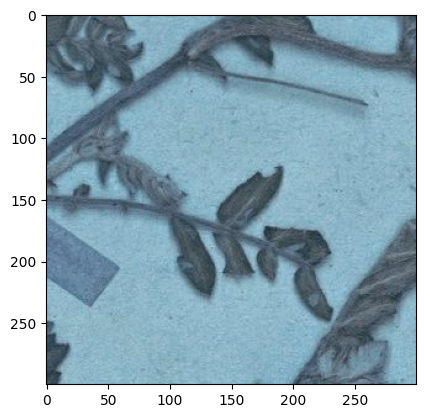

In [4]:
import matplotlib.pyplot as plt
import cv2

# Load the image using OpenCV
image_path = '/kaggle/input/vegetables-augmented/train/images/436951392_aug_out.png'
image = cv2.imread(image_path)

# # Check the data type
# print("Image Data Type:", image.dtype)

# Convert image data to float
image_float = image.astype(float)

# # Display the image
plt.imshow(image)
plt.show()


In [5]:
!mv /kaggle/input/vegetables-augmented .

mv: cannot remove '/kaggle/input/vegetables-augmented/train/labels/436960146.txt': Read-only file system
mv: cannot remove '/kaggle/input/vegetables-augmented/train/labels/436964222.txt': Read-only file system
mv: cannot remove '/kaggle/input/vegetables-augmented/train/labels/FR-0030826.txt': Read-only file system
mv: cannot remove '/kaggle/input/vegetables-augmented/train/labels/436955604_aug_out.txt': Read-only file system
mv: cannot remove '/kaggle/input/vegetables-augmented/train/labels/436961283.txt': Read-only file system
mv: cannot remove '/kaggle/input/vegetables-augmented/train/labels/436953243.txt': Read-only file system
mv: cannot remove '/kaggle/input/vegetables-augmented/train/labels/436963071.txt': Read-only file system
mv: cannot remove '/kaggle/input/vegetables-augmented/train/labels/FR-0036321.txt': Read-only file system
mv: cannot remove '/kaggle/input/vegetables-augmented/train/labels/436954710_aug_out.txt': Read-only file system
mv: cannot remove '/kaggle/input/vege

In [6]:
!cat /kaggle/input/vegetables-augmented/train/labels/436951392_aug_out.txt
# import xml.etree.ElementTree as ET

# # Specify the path to your XML file
# xml_file_path = '/kaggle/working/Annotations/FR-0036395.xml'

# # Parse the XML file
# tree = ET.parse(xml_file_path)
# root = tree.getroot()

# # Access specific elements and attributes based on your XML structure
# for object_elem in root.findall('object'):
#     # Extract class label
#     class_label = object_elem.find('name').text
    
#     # Extract bounding box coordinates
#     bbox = object_elem.find('bndbox')
#     xmin = int(bbox.find('xmin').text)
#     ymin = int(bbox.find('ymin').text)
#     xmax = int(bbox.find('xmax').text)
#     ymax = int(bbox.find('ymax').text)
    
#     print(f"Class: {class_label}, Bounding Box: {xmin}, {ymin}, {xmax}, {ymax}")


In [7]:
# import os
# import xml.etree.ElementTree as ET

# # Directory containing XML annotation files
# xml_dir ="/kaggle/working/Dataset/Annotations"

# # Initialize class_name_to_id_mapping
# class_name_to_id_mapping = {"leaf": 0, "flower": 0, "seed": 0, "stem": 0, "root": 0, "fruit": 0}

# # Iterate through each XML file in the directory
# for filename in os.listdir(xml_dir):
#     if filename.endswith(".xml"):
#         xml_path = os.path.join(xml_dir, filename)

#         # Parse XML annotations
#         tree = ET.parse(xml_path)
#         root = tree.getroot()

#         # Iterate through objects in the XML file
#         for obj in root.findall('.//object'):
#             label = obj.find('name').text

#             # Check if the label is in the mapping
#             if label in class_name_to_id_mapping:
#                 # Increment the count for the corresponding class
#                 class_name_to_id_mapping[label] += 1

# # Print the resulting mapping
# import matplotlib.pyplot as plt

# # Assuming you already have class_name_to_id_mapping populated

# # Extract class names and counts
# class_names = list(class_name_to_id_mapping.keys())
# class_counts = list(class_name_to_id_mapping.values())

# # Calculate percentages
# total_count = sum(class_counts)
# class_percentages = [count / total_count * 100 for count in class_counts]

# # Plot the bar plot with percentages
# fig, ax = plt.subplots()
# bars = ax.bar(class_names, class_counts, color='skyblue')

# # Annotate the bars with percentages
# for bar, percentage in zip(bars, class_percentages):
#     height = bar.get_height()
#     ax.annotate(f'{percentage:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
#                 xytext=(0, 3),  # 3 points vertical offset
#                 textcoords='offset points',
#                 ha='center', va='bottom')

# plt.xlabel('Class Names')
# plt.ylabel('Count')
# plt.title('Percentage of Occurrences for Each Class')
# plt.show()



Label percentages for the entire folder: {1: 21.923345459890495, 0: 50.76985264395694, 3: 20.457134457795906, 5: 5.673758865248227, 4: 0.9664498585234998, 2: 0.20945871458494103}


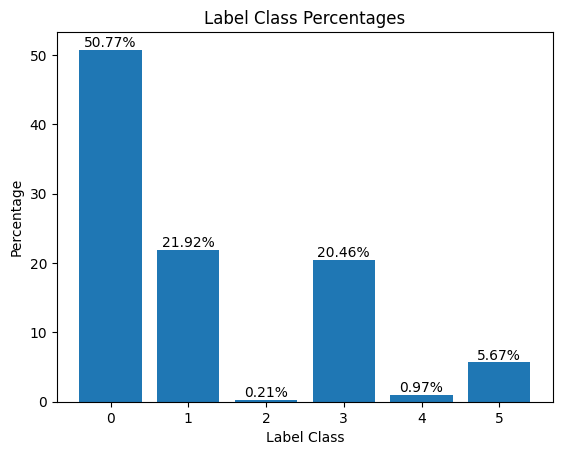

In [8]:
import os
from collections import Counter
import matplotlib.pyplot as plt

def calculate_label_percentage_for_folder(folder_path):
    # List all files in the folder with a .txt extension
    txt_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

    # Accumulate label_class occurrences across all files
    all_label_classes = []

    for file_name in txt_files:
        file_path = os.path.join(folder_path, file_name)

        # Read the content of the file
        with open(file_path, 'r') as file:
            lines = file.readlines()

        # Extract label_class from each line
        label_classes = [int(line.split()[0]) for line in lines]
        all_label_classes.extend(label_classes)

    # Count occurrences of each label_class across all files
    label_counts = Counter(all_label_classes)

    # Calculate percentages
    total_samples = len(all_label_classes)
    percentages = {label: count / total_samples * 100 for label, count in label_counts.items()}

    return percentages

def plot_label_percentages(label_percentages):
    labels, values = zip(*label_percentages.items())

    plt.bar(labels, values)
    plt.xlabel('Label Class')
    plt.ylabel('Percentage')
    plt.title('Label Class Percentages')

    # Add labels to each bar
    for label, value in zip(labels, values):
        plt.text(label, value, f'{value:.2f}%', ha='center', va='bottom')

    plt.show()

if __name__ == "__main__":
    # Specify the path to your folder
    folder_path = "/kaggle/input/vegetables-augmented/train/labels"

    # Calculate label percentages for the entire folder
    label_percentages = calculate_label_percentage_for_folder(folder_path)

    # Print or save the results
    print(f"Label percentages for the entire folder: {label_percentages}")

    # Plot the label percentages with labels
    plot_label_percentages(label_percentages)


In [9]:
import os
from collections import Counter
import matplotlib.pyplot as plt

def count_label_occurrences_for_folder(folder_path):
    # List all files in the folder with a .txt extension
    txt_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

    # Accumulate label_class occurrences across all files
    all_label_classes = []

    for file_name in txt_files:
        file_path = os.path.join(folder_path, file_name)

        # Read the content of the file
        with open(file_path, 'r') as file:
            lines = file.readlines()

        # Extract label_class from each line
        label_classes = [int(line.split()[0]) for line in lines]
        all_label_classes.extend(label_classes)

    # Count occurrences of each label_class across all files
    label_counts = Counter(all_label_classes)

    return label_counts

def plot_label_occurrences(label_occurrences):
    labels, values = zip(*label_occurrences.items())

    plt.bar(labels, values)
    plt.xlabel('Label Class')
    plt.ylabel('Occurrences')
    plt.title('Label Class Occurrences')

    # Add labels to each bar
    for label, value in zip(labels, values):
        plt.text(label, value, str(value), ha='center', va='bottom')

    plt.show()

if __name__ == "__main__":
    # Specify the path to your folder
    folder_path = "/kaggle/input/vegetables-augmented/train/labels"

    # Count label occurrences for the entire folder
    label_occurrences = count_label_occurrences_for_folder(folder_path)

    # Print or save the results
    print(f"Label occurrences for the entire folder: {label_occurrences}")

    # Plot the label occurrences with labels
#     plot_label_occurrences(label_occurrences)


Label occurrences for the entire folder: Counter({0: 13816, 1: 5966, 3: 5567, 5: 1544, 4: 263, 2: 57})


In [10]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5310.5/8062.4 GB disk)


In [11]:

from ultralytics import YOLO

from IPython.display import display, Image

In [12]:
# # Function to get the data from XML Annotation

# import xml.etree.ElementTree as ET
# import cv2
# import numpy as np

# def extract_info_from_xml(xml_file):
#     root = ET.parse(xml_file).getroot()
    
#     # Initialise the info dict 
#     info_dict = {}
#     info_dict['bboxes'] = []

#     # Parse the XML Tree
#     for elem in root:
#         # Get the file name 
#         if elem.tag == "filename":
#             info_dict['filename'] = elem.text
            
#         # Get the image size
#         elif elem.tag == "size":
#             image_size = []
#             for subelem in elem:
#                 image_size.append(int(subelem.text))
            
#             info_dict['image_size'] = tuple(image_size)
        
#         # Get details of the bounding box 
#         elif elem.tag == "object":
#             bbox = {}
#             for subelem in elem:
#                 if subelem.tag == "name":
#                     bbox["class"] = subelem.text
                    
#                 elif subelem.tag == "bndbox":
#                     for subsubelem in subelem:
#                         bbox[subsubelem.tag] = int(subsubelem.text)            
#             info_dict['bboxes'].append(bbox)
    
#     return info_dict

In [13]:
# print(extract_info_from_xml('/kaggle/working/Dataset/Annotations/436956395.xml'))

In [14]:
# # Dictionary that maps class names to IDs
# class_name_to_id_mapping = {"leaf": 0,
#                            "flower": 1,
#                            "seed": 2,
#                            "stem": 3,
#                            "root":4,
#                            "fruit":5}

# # Convert the info dict to the required yolo format and write it to disk
# def convert_to_yolov5(info_dict):
#     print_buffer = []
    
#     # For each bounding box
#     for b in info_dict["bboxes"]:
#         try:
#             class_id = class_name_to_id_mapping[b["class"]]
#         except KeyError:
#             print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
        
#         # Transform the bbox co-ordinates as per the format required by YOLO v5
#         b_center_x = (b["xmin"] + b["xmax"]) / 2 
#         b_center_y = (b["ymin"] + b["ymax"]) / 2
#         b_width    = (b["xmax"] - b["xmin"])
#         b_height   = (b["ymax"] - b["ymin"])
        
#         # Normalise the co-ordinates by the dimensions of the image
#         image_w, image_h, image_c = info_dict["image_size"]  
#         b_center_x /= image_w 
#         b_center_y /= image_h 
#         b_width    /= image_w 
#         b_height   /= image_h 
        
#         #Write the bbox details to the file 
#         print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
#     # Name of the file which we have to save 
#     save_file_name = os.path.join("/kaggle/working/Dataset/Annotations", info_dict["filename"].replace("jpg", "txt"))
    
#     # Save the annotation to disk
#     print("\n".join(print_buffer), file= open(save_file_name, "w"))

In [15]:
# import torch
# from IPython.display import Image  # for displaying images
# import os 
# import random
# import shutil
# from sklearn.model_selection import train_test_split
# import xml.etree.ElementTree as ET
# from xml.dom import minidom
# from tqdm import tqdm
# from PIL import Image, ImageDraw
# import numpy as np
# import matplotlib.pyplot as plt

# random.seed(108)
# # Get the annotations
# annotations = [os.path.join('/kaggle/working/Dataset/Annotations', x) for x in os.listdir('/kaggle/working/Dataset/Annotations') if x[-3:] == "xml"]
# annotations.sort()

# # Convert and save the annotations
# for ann in tqdm(annotations):
#     info_dict = extract_info_from_xml(ann)
#     convert_to_yolov5(info_dict)
# annotations = [os.path.join('/kaggle/working/Dataset/Annotations', x) for x in os.listdir('/kaggle/working/Dataset/Annotations') if x[-3:] == "txt"]


In [16]:
!mv ../input/vegetables-augmented .

mv: inter-device move failed: '../input/vegetables-augmented' to './vegetables-augmented'; unable to remove target: Directory not empty


In [17]:
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Read images and annotations
images = [os.path.join('/kaggle/working/vegetables-augmented/train/images', x) for x in os.listdir('/kaggle/working/vegetables-augmented/train/images')]
annotations = [os.path.join('/kaggle/working/vegetables-augmented/train/labels', x) for x in os.listdir('/kaggle/working/vegetables-augmented/train/labels') if x[-3:] == "txt"]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
os.mkdir('train')
os.mkdir('train/images')
os.mkdir('train/labels')

os.mkdir('validation')
os.mkdir('validation/images')
os.mkdir('validation/labels')



os.mkdir('test')
os.mkdir('test/images')
os.mkdir('test/labels')

In [19]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, '/kaggle/working/train/images')
move_files_to_folder(val_images, '/kaggle/working/validation/images/')
move_files_to_folder(test_images, '/kaggle/working/test/images/')
move_files_to_folder(train_annotations, '/kaggle/working/train/labels/')
move_files_to_folder(val_annotations, '/kaggle/working/validation/labels/')
move_files_to_folder(test_annotations, '/kaggle/working/test/labels/')
# import shutil

In [20]:
# import shutil

# src_path = r"/kaggle/input/dataset/data.yaml"
# dst_path = r"/kaggle/working/"
# shutil.copy(src_path, dst_path)
# print('Copied')

In [21]:


text = """
train: /kaggle/working/train
val: /kaggle/working/test

names: ["leaf","flower","seed","stem","root","fruit"]
nc: 6

train: /kaggle/working/train/
val: /kaggle/working/validation/
test : /kaggle/working/test/


focal_loss: 1
counters_per_class: 13816, 5966, 57, 5567, 263, 1544
"""
with open("data.yaml", 'w') as file:
    file.write(text)



In [22]:
!cat data.yaml


train: /kaggle/working/train
val: /kaggle/working/test

names: ["leaf","flower","seed","stem","root","fruit"]
nc: 6

train: /kaggle/working/train/
val: /kaggle/working/validation/
test : /kaggle/working/test/


focal_loss: 1
counters_per_class: 13816, 5966, 57, 5567, 263, 1544


In [23]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO('yolov8n.pt')  # build from YAML and transfer weights


100%|██████████| 6.23M/6.23M [00:00<00:00, 77.6MB/s]



In [24]:
results = model.train(data="data.yaml", 
      name = 'licence_plate', epochs=100,batch = 24,  cache = True,
       iou = 0.45,
      augment=True, lr0=0.001, optimizer='Adam')

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=data.yaml, epochs=100, patience=50, batch=24, imgsz=640, save=True, cache=True, device=, workers=8, project=None, name=licence_plate, exist_ok=False, pretrained=False, optimizer=Adam, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.45, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, op

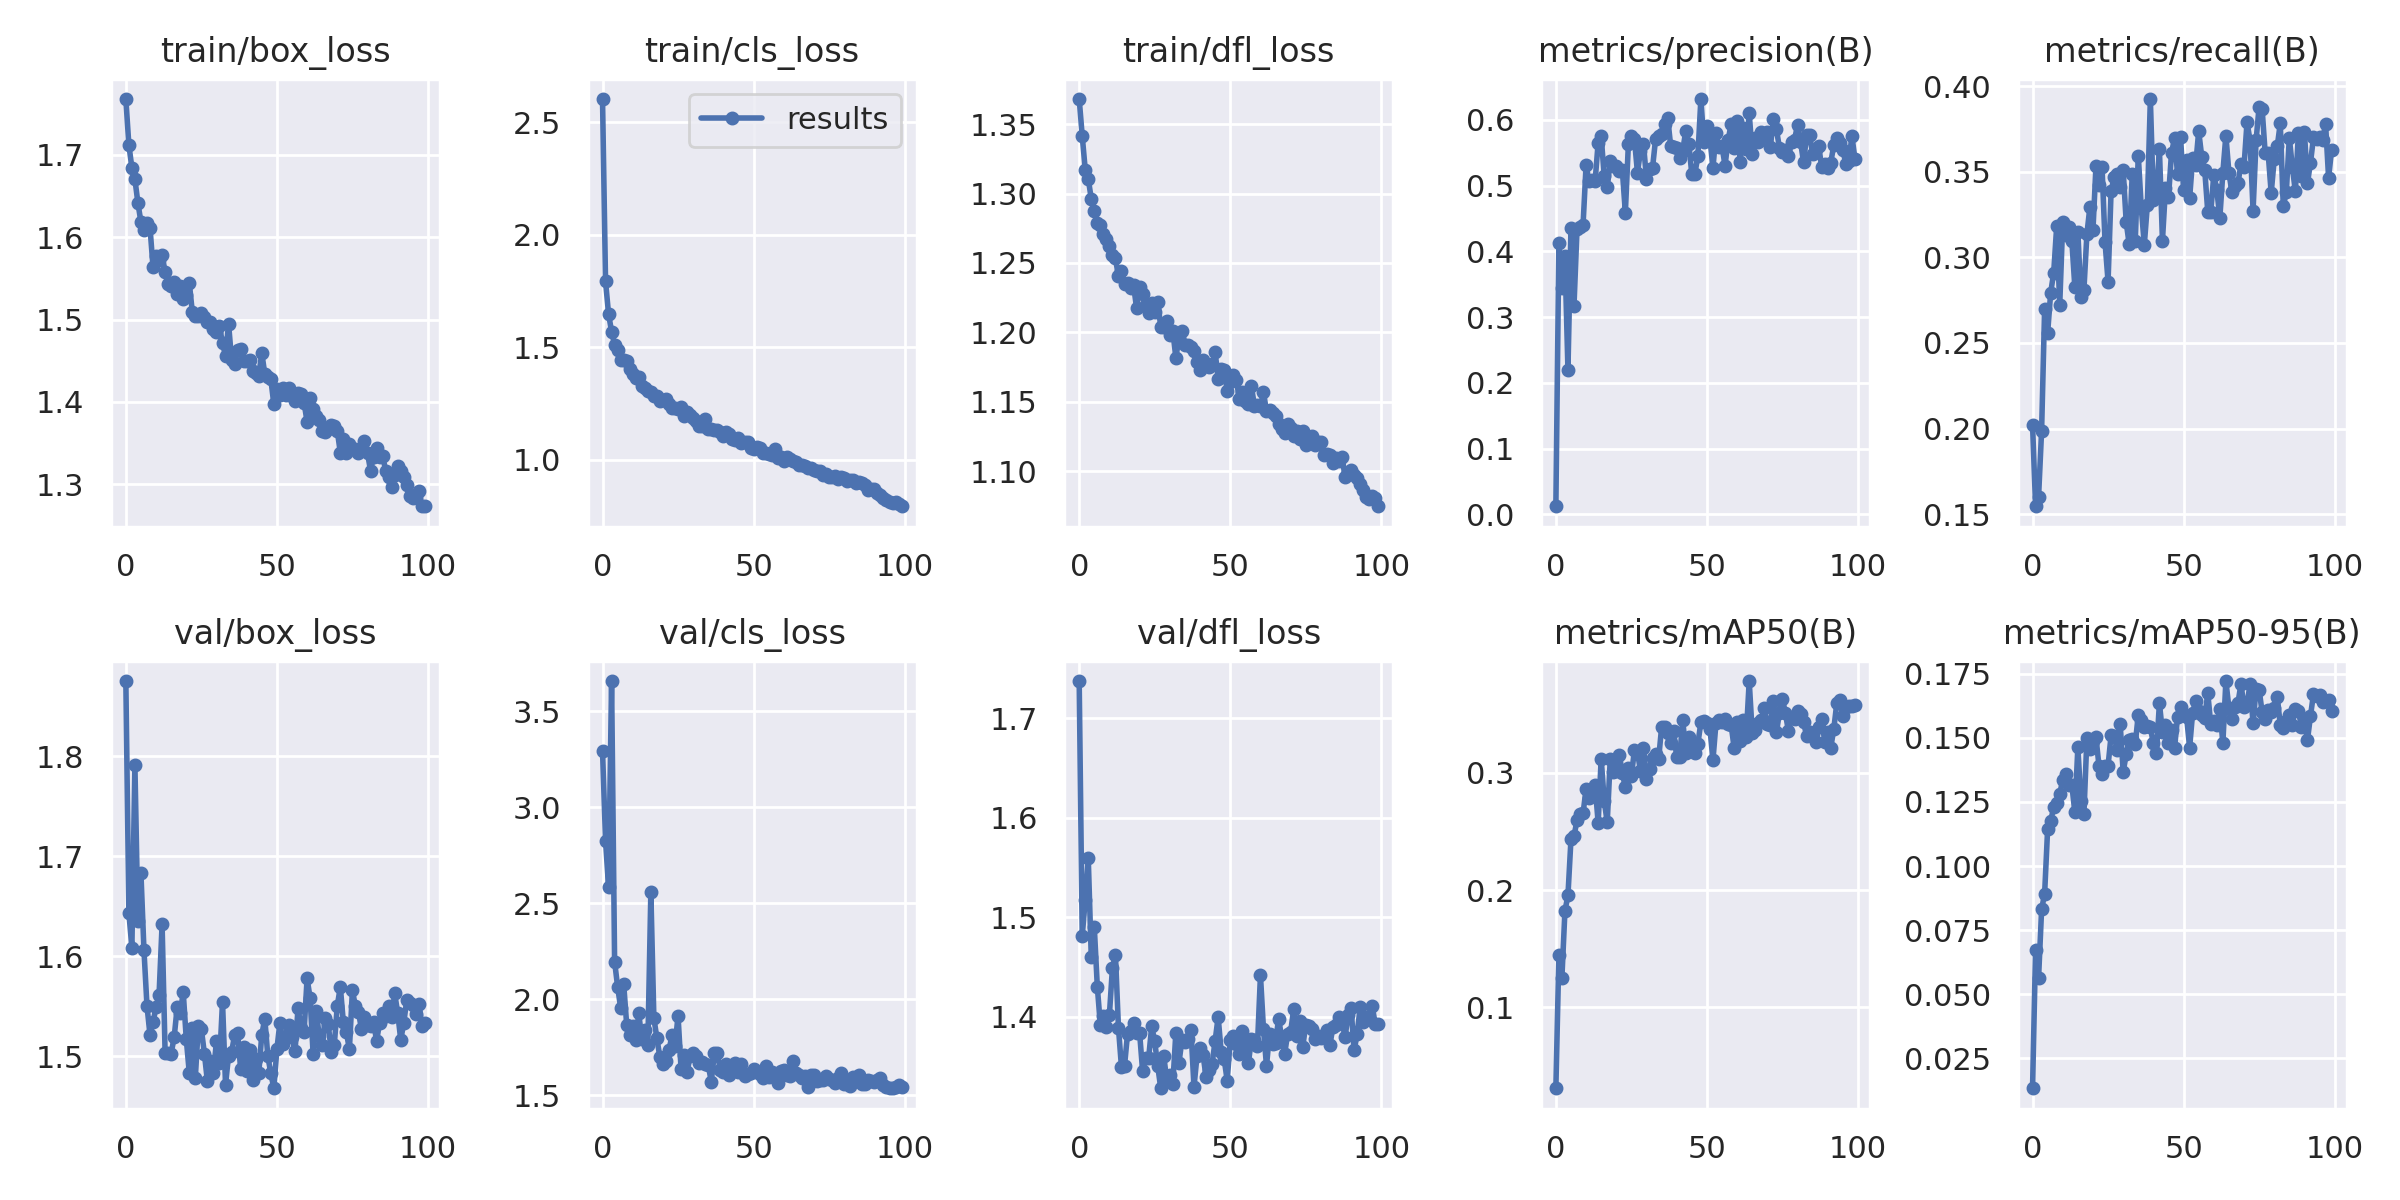

In [25]:
# from IPython.display import FileLink
from IPython.display import display, Image
Image(filename="/kaggle/working/runs/detect/licence_plate/results.png", height=800)

GROUND TRUTH TRAINING DATA:


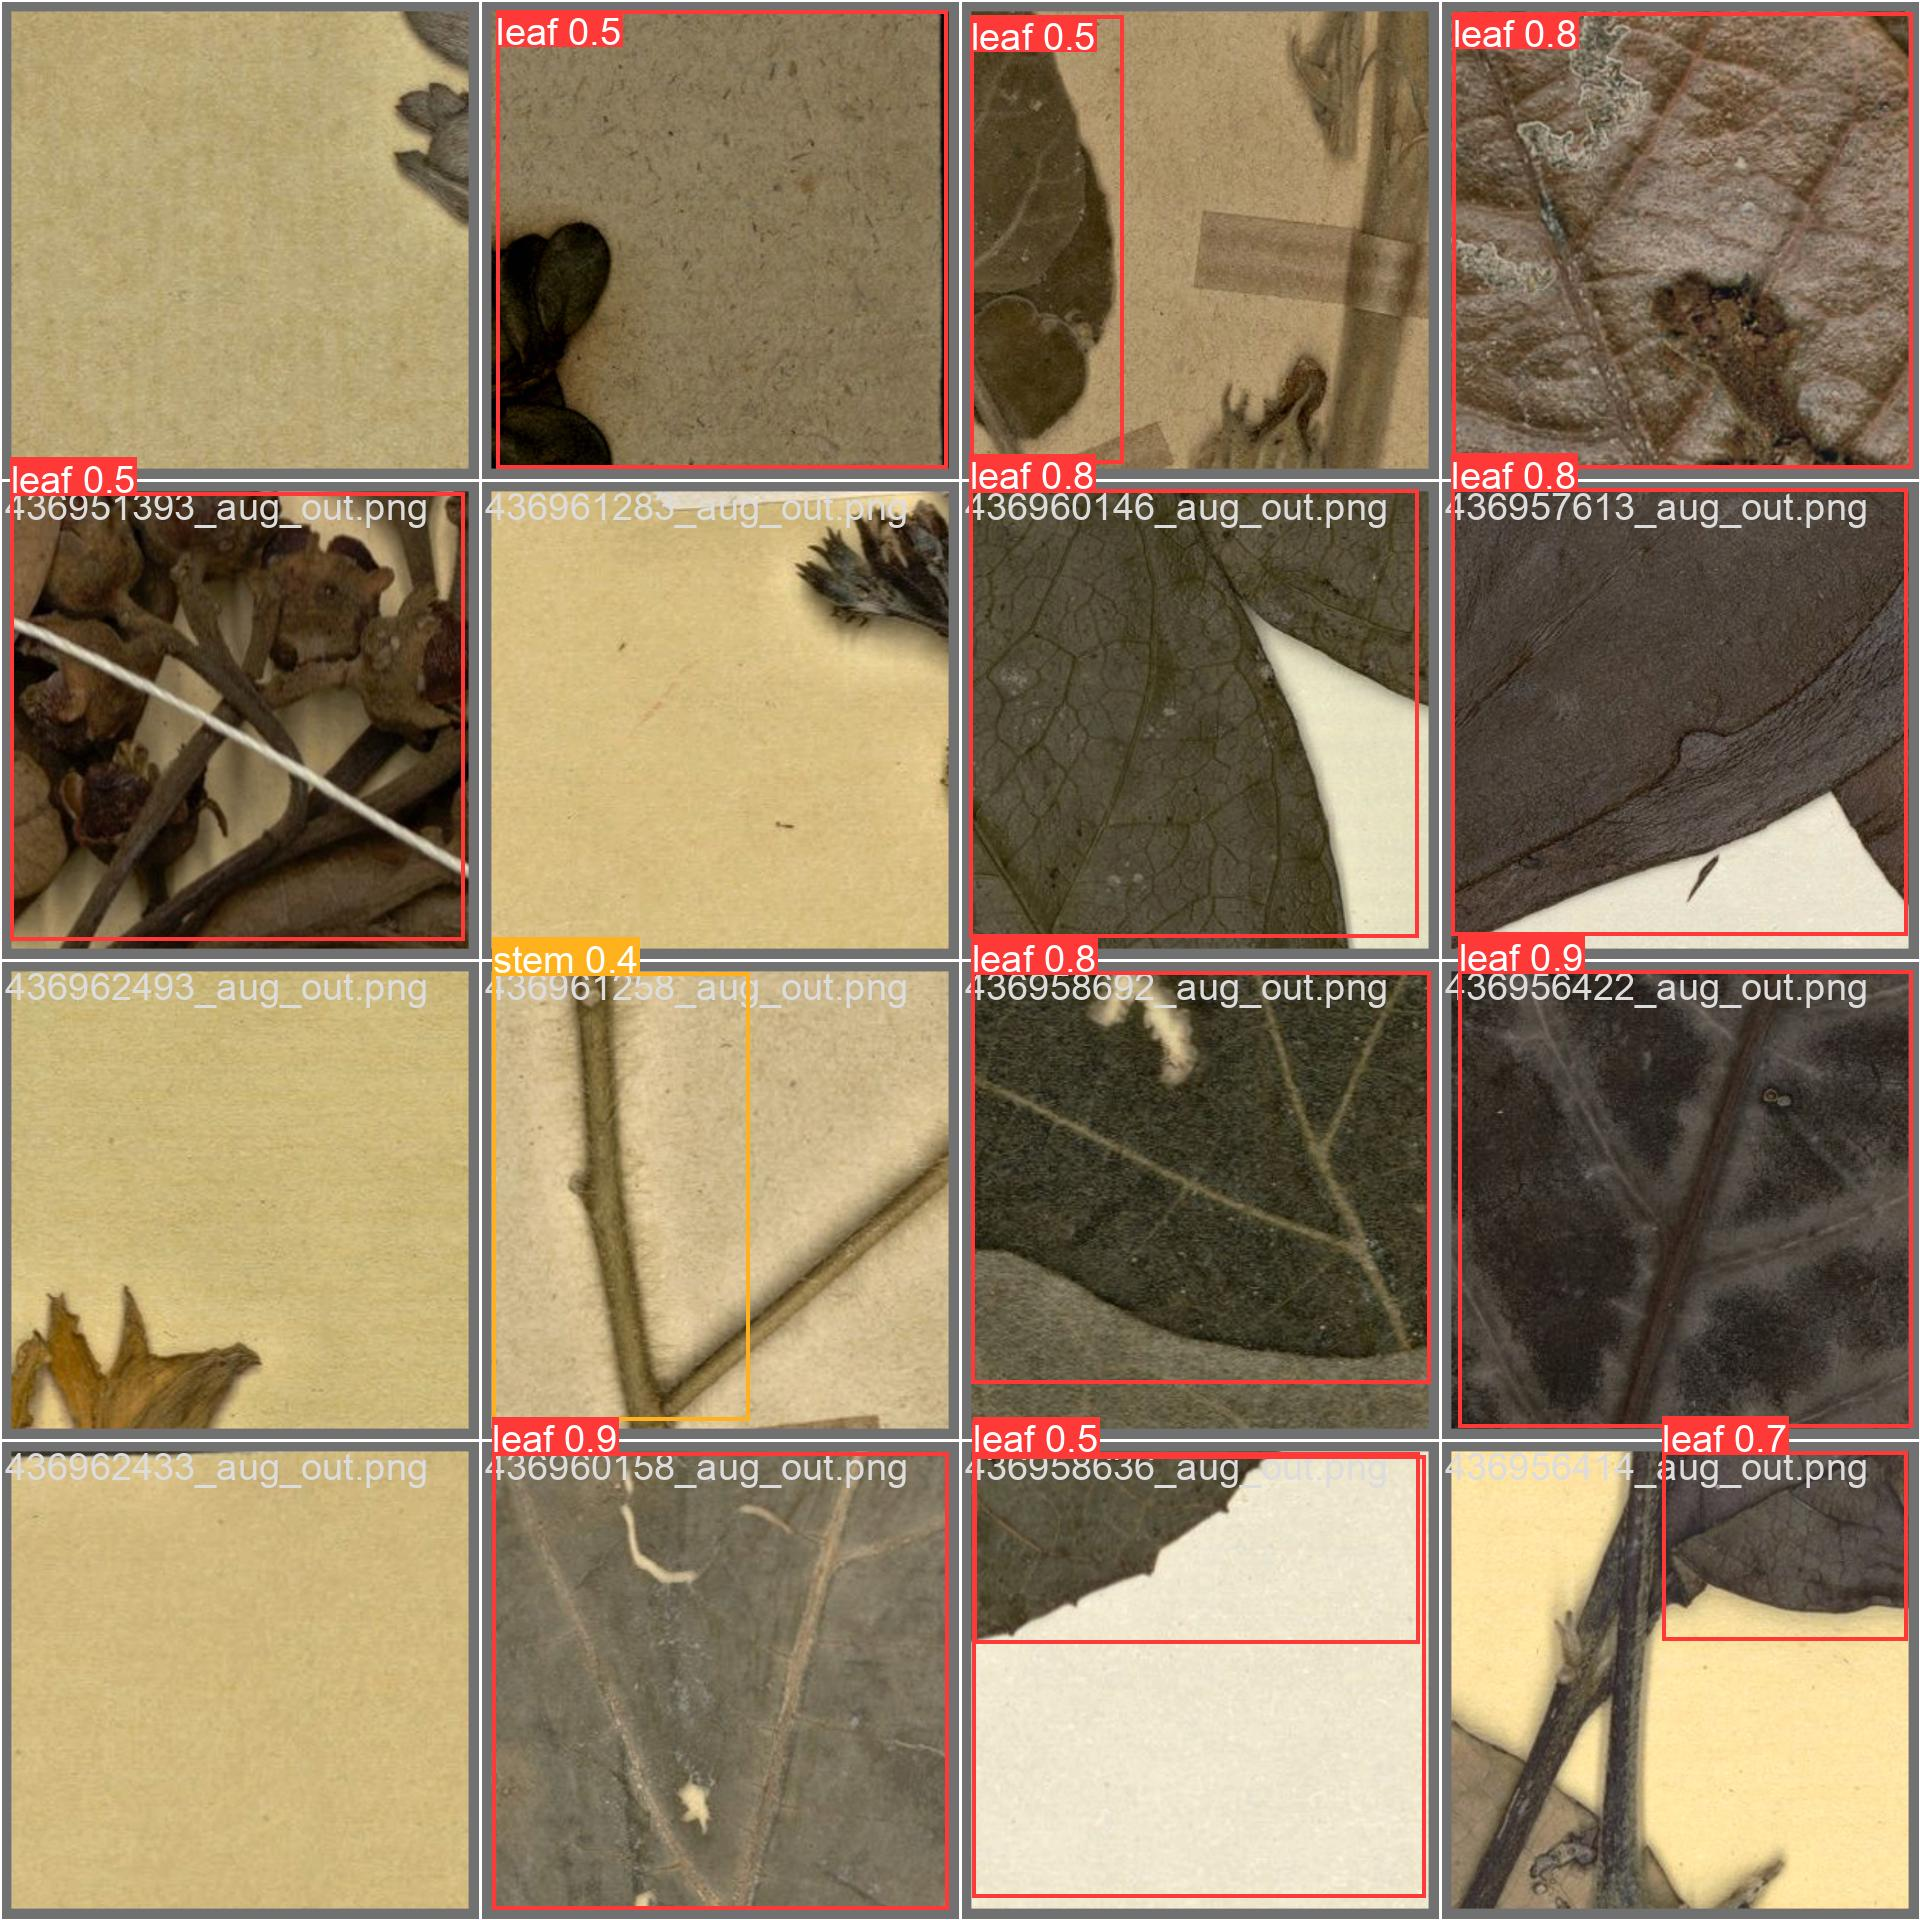

In [26]:
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/kaggle/working/runs/detect/licence_plate/val_batch0_pred.jpg', width=900)

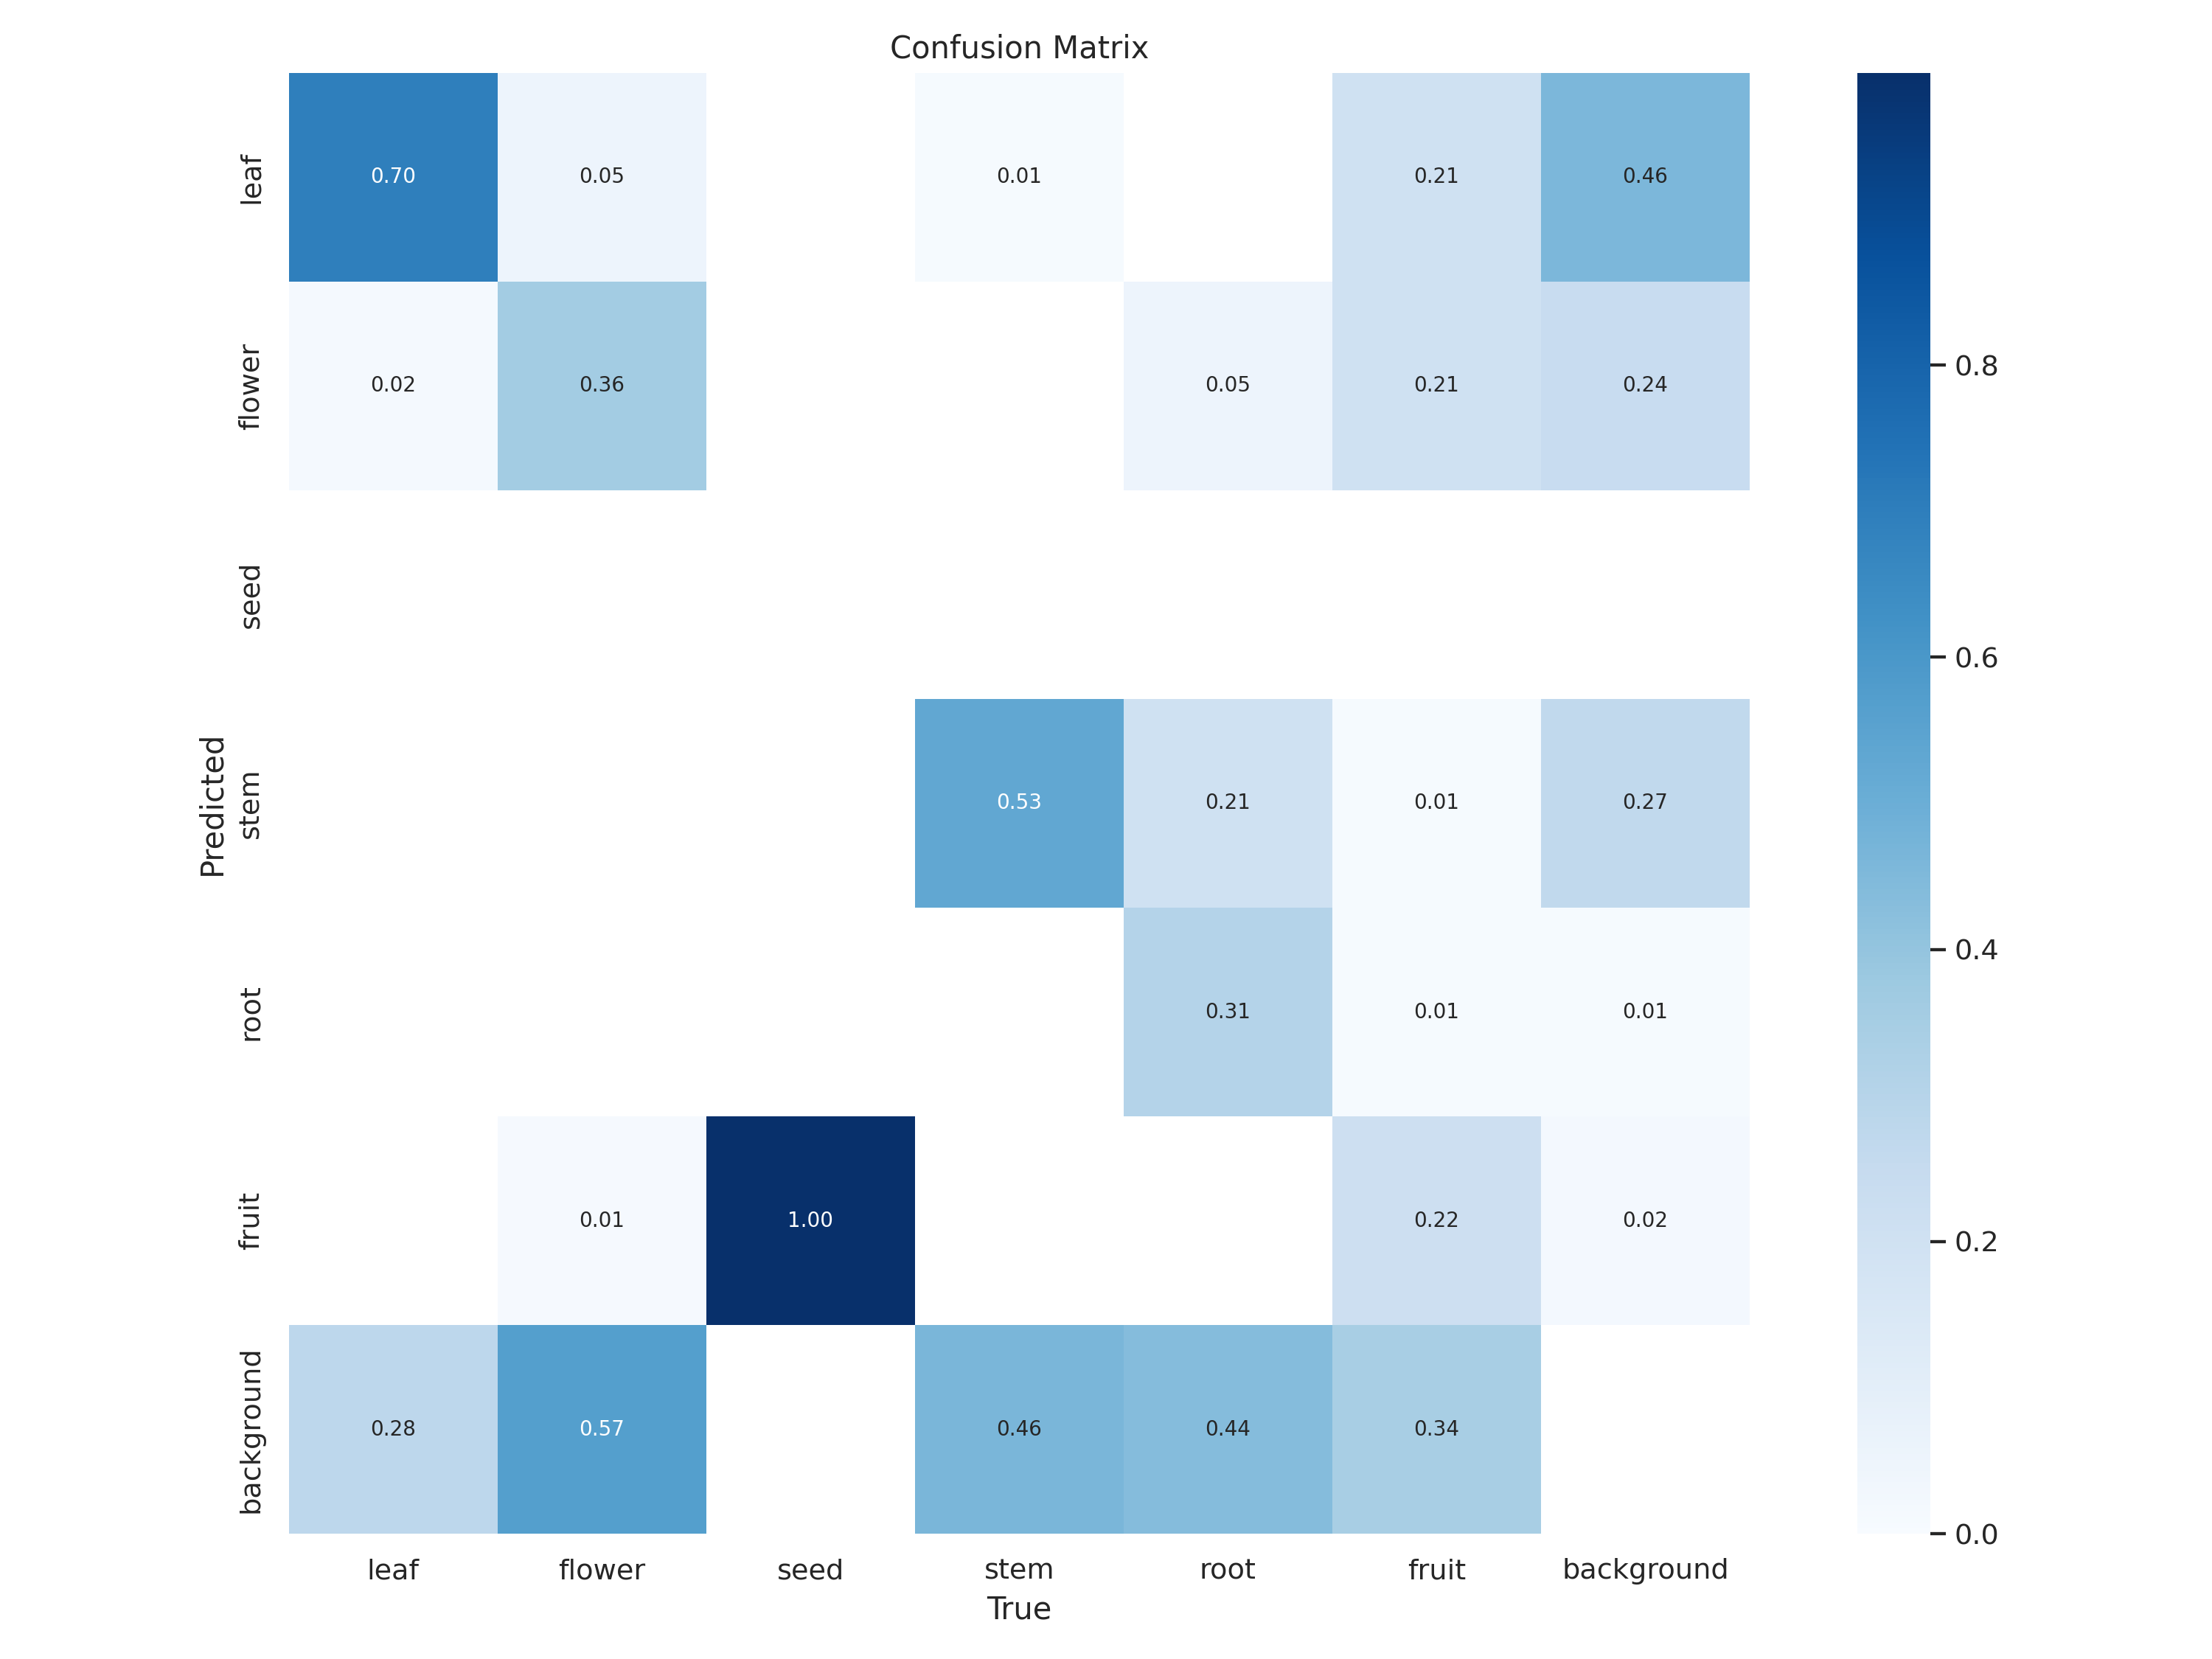

In [27]:
Image(filename='/kaggle/working/runs/detect/licence_plate/confusion_matrix.png', width=900)


In [28]:
!yolo task=detect mode=val model=./runs/detect/licence_plate/weights/best.pt data=data.yaml conf=0.45


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/working/validation/labels.cache... 139 images, 0 backgroun
val: WARNING ⚠️ /kaggle/working/validation/images/436957613_aug_out.png: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        139       2354      0.604      0.257       0.43      0.242
                  leaf        139       1143      0.772      0.579       0.69       0.46
                flower        139        590      0.634      0.205      0.419      0.227
                  seed        139          1     

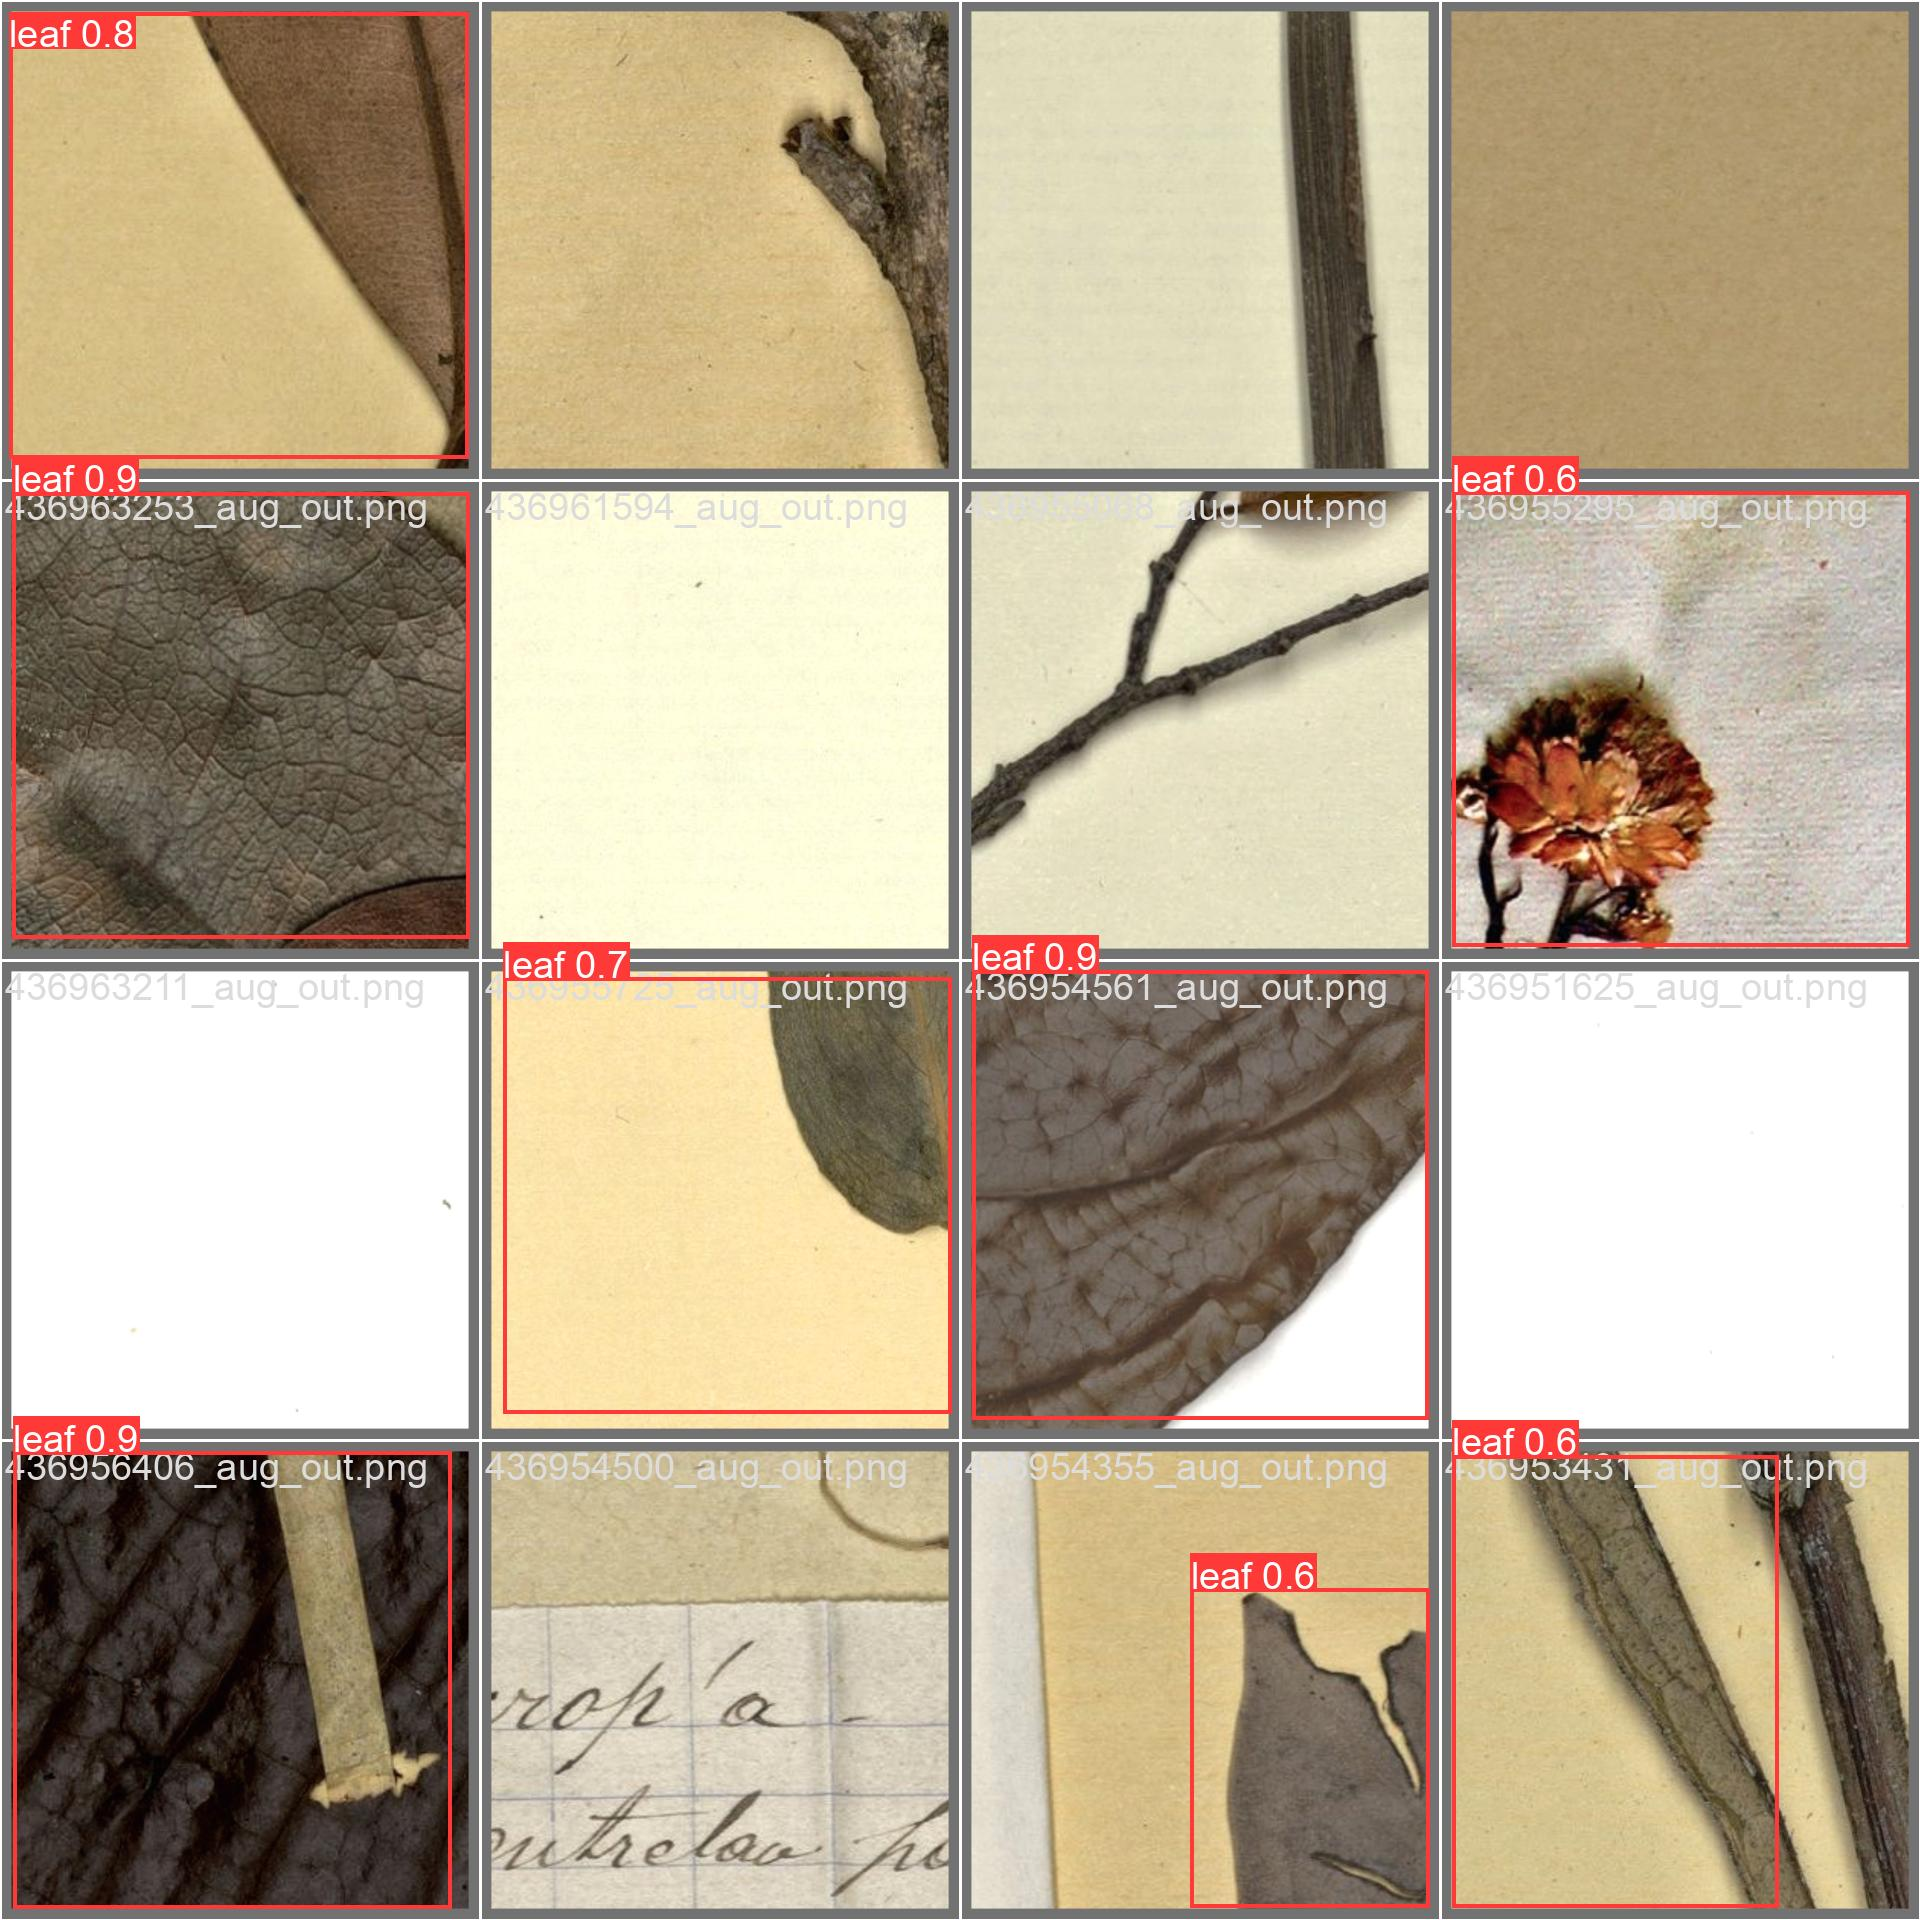

In [29]:
# displying ground truth on test data
Image(filename='/kaggle/working/runs/detect/val/val_batch2_pred.jpg', width=900)